# Linear Regression

There are two common types of supervised machine learning algorithms: regression and classification. *Regression* involves predicting a continuous value, while *classification* involves predicting a discrete value. For instance, predicting the price of a house is a regression problem, whereas predicting whether an image is of a cat or a dog is a classification problem.


## Prerequisites:

To start with Linear Regression, you must be aware of a few basic concepts in statistics:
- Correlation ($r$) - Explains the relationship between two variables; possible values between -1 to +1
- Variance ($\sigma^{2}$) - Measure of spread in your data (square root of the variance)
- Residual (error term) - { Actual Value - Predicted Value }


## Learning Objective:

- Understand Linear Regression
    - Simple Linear Regression
    - Multiple Linear Regression
- Understand how to fit a linear model using Scikit-Learn
- Understand various error metrics and their benefits/drawbacks
    - Residual Sum of Squares (RSS)
    - Mean Squared Error (MSE)
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Error (MAE)
- Ability to build a model for a real-world dataset and interpret the results


## Regression

Regression analysis is a powerful set of tools in the field of statistics and machine learning which helps to find a relationship between two or more variables of interest. There are many regression methods available, with linear regression being one of the simplest. Linear regression assumes a linear relationship between one or more independent variables and a dependant variable. The *independent variables* are often referred to as predictors, covariates, features, or input variables, while the *dependent variable* is often called the response or outcome variable. 

In this lesson, we will briefly study what linear regression is and how it can be performed for both single and multiple input variables using Scikit-Learn.


## Linear Regression

Linear regression is one of the simplest regression approaches in machine learning. It is a method used to define a relationship between the input variable(s) $X$ and a single output variable $y$. One needs to identify the dependent variable, which will vary based on the value of the independent variable(s). For example, the value of the house (dependent variable or $y$) varies based on the square meters of the house (independent variable or $x$). Depending upon the number of input variables, linear regression can be classified into two categories:
- Simple Linear Regression (Single Input Variables)
- Multiple Linear Regression (Multiple Input Variables)
 

 
### Simple Linear Regression

In simple linear regression, we have a *single* input variable $x$ and a single output variable $y$. Our goal is to find a linear relationship between these variables. Mathematically, this relationship takes on the form $y = \beta_0 + \beta_1x$, where
- $y$ is the output variable (e.g., value of a house)
- $x$ is the input variable (e.g., size of a house in square meters)
- $\beta_{0}$ is the $y$-intercept/bias (i.e., the value of $y$ when $x=0$)
- $\beta_{1}$ is the coefficient for $x$ (i.e., the slope of the regression line)

You might recognize this expression from your school algebra as the *slope-intercept form* of a line: $y = mx + b$. In the case of simple linear regression, the slope $\beta_{1}$ represents the average increase in the response variable $y$ relative to a one-unit increase in the predictor variable $x$.

### Multiple Linear Regression

Multiple linear regression generalizes simple linear regression by allowing more than one input variable: $x_{1},x_{2},\ldots,x_{n}$. The goal of multiple linear regression is to find a relationship between the input variables an the output variable. This relationship is represented mathematically as follows $$y  = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + \cdots + \beta_{n}x_{n}$$
In the case of multiple linear regression, $\beta_{1}$ through $\beta_{n}$ are the estimated regression coefficients for the independent variables $x_{1}$ through $x_{n}$.  The coefficent $\beta_{i}$ ($1 \leq i \leq n$) represents the average increase in $y$ relative to a one-unit increase in $x_{i}$ when all other variables $x_{j}$ ($i \neq j$) are held constant.

## Implementation

### Imports

In [ ]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
from IPython.display import display, HTML

### Synthetic Dataset

To better understand linear regression, we are going to start with a simple synthetic example. The code for generating it is placed below. You can read or skip them at your will.


We begin by creating `n_points` along the line $y=2x+5$ using the [`numpy.random.uniform`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html) function.  Then we add random normal noise to the points using the [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) function. We can then view our data using Matplotlib.

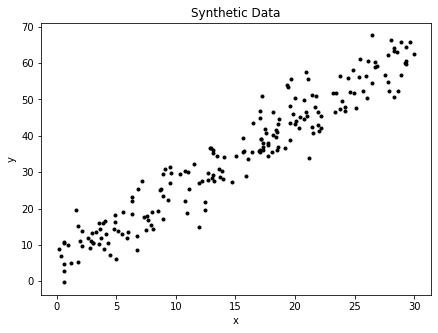

In [ ]:
n_points = 200
M = 2.0 #slope
B = 5.0 #intercept
X_MIN = 0.0
X_MAX = 30.0

# we are using a RandomState object to get the same random numbers each time
random = np.random.RandomState(0)

# create random x values
X = random.uniform(low=X_MIN, high=X_MAX, size=n_points) 

# calculate y values along the line
y = M * X + B

# add random noise
y += random.normal(loc=0.0, scale=5.0, size=y.shape)

X_min, X_max = np.min(X), np.max(X)
y_min, y_max = np.min(y), np.max(y)
xlim = np.asarray((X_min - 0.05*(X_max-X_min), X_max + 0.05*(X_max-X_min)))
ylim = np.asarray((y_min - 0.05*(y_max-y_min), y_max + 0.05*(y_max-y_min)))

# visualize data
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(X, y, color="black", marker=".")
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_title("Synthetic Data")
plt.show()

The objective of linear regression is to fit a line through these points. However, there are an infinite number of lines that can be drawn through our collection of points. Some lines are clearly better than others. Our goal is to find the line that best fits most of the data points. You can think of the points as the houses in a town in which we need to build a road. Each house would like to be as close as possible to the road, so we need to find the road that passes closest to as many houses as possible.

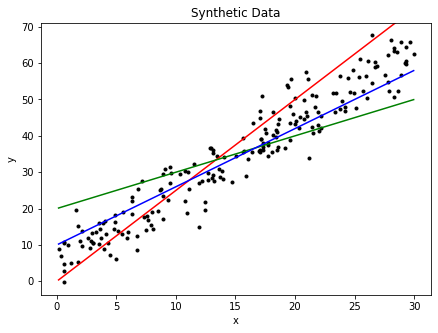

In [ ]:
# Synthetically Generated Points 
X_val = np.asarray( (X_min,X_max) )

# Equation for Red line
Xy1 = np.stack([X_val, 2.5 * X_val + 0], axis=-1)

# Equation for Green line
Xy2 = np.stack([X_val, 1.0 * X_val + 20], axis=-1)

# Equation for Blue line
Xy3 = np.stack([X_val, 1.6 * X_val + 10], axis=-1)

# Visualising the points and the lines
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(X, y, color="black", marker=".")
ax.plot(Xy1[:,0], Xy1[:,1], color="red")
ax.plot(Xy2[:,0], Xy2[:,1], color="green")
ax.plot(Xy3[:,0], Xy3[:,1], color="blue")
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_title("Synthetic Data")
plt.show()


### Learning a Simple Linear Model

Recall that we wish to model the data in the form $y = \beta_{0} + \beta_{1}x$. We are going to use Scikit-Learn's [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) predictor object to estimate $\beta_{0}$ and $\beta_{1}$. It is common to use the ordinary least squares (OLS) method to calculate $\beta_{0}$ and $\beta_{1}$. The discussion of the OLS method is beyond the scope of this chapter.

The `LinearRegression` object has a [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method for learning the model and a [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method for predicting the outcomes using the fitted model: given an input value $\hat{x}$, the predicted output value is $\hat{y} = \beta_{0} + \beta_{1}\hat{x}$.  After fitting the model, the estimated coefficients can be accessed through the `coef_` attribute; the $y$-intercept is stored in the `intercept_` attribute.

The learned coefficients should be close to the coefficients in our line $y=2x+5$ used to generate the data. Observe that our fitted model (using Scikit-Learn's `LinearRegression`) is $y = 5.53 + 1.93x$.

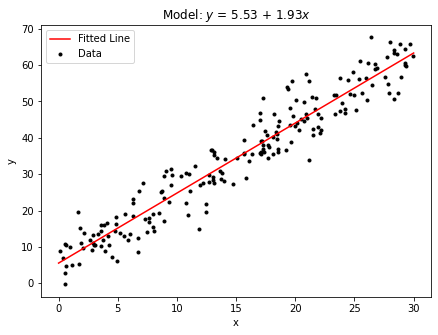

In [ ]:
# Import Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

# Instantiating Linear Regression model
linear_regression = LinearRegression()

# Training the linear regression model
linear_regression.fit(X.reshape(-1,1), y.reshape(-1,1))

# Prediction and data to plot
X_hat = np.linspace(start=X_MIN, stop=X_MAX, num=2)
y_hat = linear_regression.predict(X_hat.reshape(-1,1))
model = "$y$ = {:.2f} + {:.2f}$x$".format(linear_regression.intercept_[0], *linear_regression.coef_[0])

# plotting the data and prediction line
fig,ax = plt.subplots(figsize=(7,5))
ax.scatter(X, y, color="black", marker=".", label="Data")
ax.plot(X_hat, y_hat, color="red", label="Fitted Line")
ax.set_ylabel("y")
ax.set_xlabel("x")
ax.set_title("Model: " + model)
ax.legend()
plt.show()

### Advertising Dataset

Now that we know the objective behind linear regression and how we can use Scikit-Learn to build a simple regression model, we will use a real world dataset hereafter to discuss how linear regression is actually applied in practice.

A popular introductory statistics book, [An Introduction to Statistical Learning](https://www.statlearning.com), provides several [datasets](https://www.statlearning.com/resources-second-edition) on their website. We will use the advertising dataset. This dataset can be downloaded from the following address:
  * https://www.statlearning.com/s/Advertising.csv


**Dataset Description**

The advertising dataset consists of the number of units of product sold in 200 different markets.  Included with the sales figure are TV, radio, and newspaper advertising budgets.  All values are reported in thousands.  For example, the first row corresponds to 22,100 units sold with \$230,100, \$37,800, and \$69,200 spent on TV, radio, and newspaper marketing, respectively.

In [ ]:
data_path = "https://www.statlearning.com/s/Advertising.csv" 

# Read the CSV data from the link
data_df = pd.read_csv(data_path,index_col=0)

# Print out first 5 samples from the DataFrame
data_df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Scatterplots

Before applying linear regression, we should determine whether or not there is a linear relationship between the variables of interest. A scatterplot is a good starting point to help in determining the strength of the relationship between two variables.


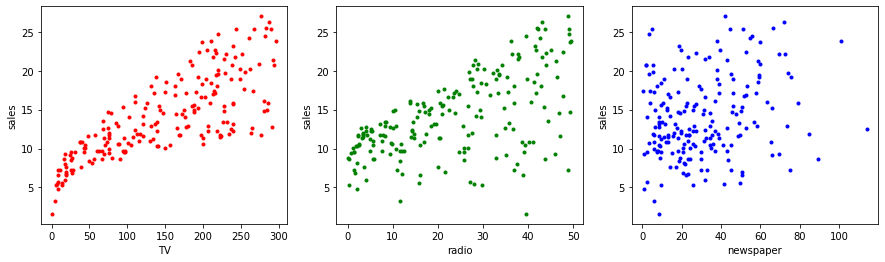

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# Plot of sales vs TV
ax = fig.add_subplot(gs[0])
ax.scatter(data_df["TV"], data_df["sales"], color="red", marker=".")
ax.set_xlabel("TV")
ax.set_ylabel("sales")

# Plot of sales vs radio
ax = fig.add_subplot(gs[1])
ax.scatter(data_df["radio"], data_df["sales"], color="green", marker=".")
ax.set_xlabel("radio")
ax.set_ylabel("sales")

# Plot of sales vs newspaper
ax = fig.add_subplot(gs[2])
ax.scatter(data_df["newspaper"], data_df["sales"], color="blue", marker=".")
ax.set_xlabel("newspaper")
ax.set_ylabel("sales")

plt.show()

The first plot shows a sharp upward trend in the number of units sold as TV advertising increases. A similar trend is also found as radio advertising increases. However, in the last plot, there does not appear to be a relationship between newspaper advertising and the number of units sold.

### Simple Linear Regression

We will try to understand how each of the media advertising is associated with sales using simple linear regression . Here, the input variable $x$ will be one of the advertising mediums, and the output variable $y$ will be the number of units sold. Again, our goal is to learn a linear model of the form $y = \beta_{0} + \beta_{1}x$, where $x$ is either TV, radio, or newspaper.




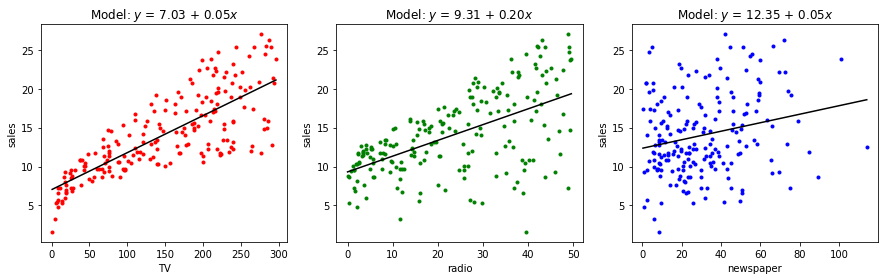

In [ ]:
fig = plt.figure(figsize=(15,4))
gs = mpl.gridspec.GridSpec(1,3)

# function for training model and plotting
def train_plot(data_df, feature, ax, c):
  
    
    LR_feature = LinearRegression()
    LR_feature.fit(data_df[[feature]], data_df[["sales"]])

    # Predictions
    X_hat = np.linspace(start=data_df[feature].min(), stop=data_df[feature].max(), num=2)
    y_hat = LR_feature.predict( X_hat.reshape(-1,1) )

    # Plot of sales vs TV
    model = "$y$ = {:.2f} + {:.2f}$x$".format(LR_feature.intercept_[0], *LR_feature.coef_[0])
    ax.scatter(data_df[feature], data_df["sales"], color=c, marker=".")
    ax.plot(X_hat, y_hat, color="black")
    ax.set_xlabel(feature)
    ax.set_ylabel("sales")
    ax.set_title("Model: " + model)
    return ax

# Train model using TV data to predict sales
ax0 = fig.add_subplot(gs[0])
train_plot(data_df, "TV", ax0, "red")

# Train model using radio data to predict sales
ax1 = fig.add_subplot(gs[1])
train_plot(data_df, "radio", ax1, "green")

# Train model using newspaper data to predict sales
ax2 = fig.add_subplot(gs[2])
train_plot(data_df, "newspaper", ax2, "blue")

plt.show()

**TV:**

The estimated model does a pretty good job of placing a straight line through our data.  We obtain a model of $y = 7.03 + 0.05x$ for the relationship between the independent variable TV and the dependent variable sales. If no money is spent on TV advertising, we expect to sell 7,030 units of product on average. This model implies that for every additional \\$1,000 (1 unit is 1000 in this example) we spend on TV advertising, we expect to sell 50 more units of product on average. If \\$5,000 is spent on TV advertising, we expect to sell 7,280 units of product on average ($7.03 + 0.05 \times 5 = 7.28$).

**Radio:**

While the estimated model for radio spending does not appear as good as the model for TV, it still does ok. The model obtained is $y = 9.31 + 0.20x$. Under this model, we expect to sell 9,310 units of product on average, if no money is spent on radio advertising. On average, we expect to sell 200 more units of product for every additional \$1,000 spent on radio advertising.  If \$2,000 is spent on radio advertising, on average we expect to sell 9,710 units of product ($9.31 + 0.20 \times 2 = 9.71$).

**Newspaper:**

Based on the scatter plot for newspaper spending, there does not appear to be a linear relationship between money spent on newspaper advertising and units of product sold. While a linear model can be fitted to this data, one should not expect any interpretations of the model to be very useful.





### Multiple Linear Regression

Given that money is spent on each of the three types of advertising simultaneously, it is not unreasonable to believe that a single advertising variable is inadequate to describe the number of units sold. For the advertising dataset, there is good reason to believe that both TV and radio advertising are needed to account for the number of units sold. Multiple linear regression can be used to find a linear relationship between multiple predictors (independent variables) and a response variable (dependent variable). The `LinearRegression` object can also be used to perform multiple linear regression.



In [ ]:
# Training Linear Regression using TV and Radio features
linear_regression = LinearRegression()
linear_regression.fit(data_df[["TV", "radio"]], data_df[["sales"]])

message = """<strong>TV and Radio</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio
""".format(*linear_regression.intercept_, *linear_regression.coef_[0])
display(HTML( message ))

print("")

# Training Linear Regression using all features
linear_regression = LinearRegression()
linear_regression.fit(data_df[["TV", "radio", "newspaper"]], data_df[["sales"]])
message = """<strong>TV, Radio, and Newspaper</strong> <br>
$y$ = {:.2f} + {:.2f}$x_{{1}}$ + {:.2f}$x_{{2}}$ + {:.2f}$x_{{3}}$ <br>
$x_{{1}}$ = TV <br>
$x_{{2}}$ = radio <br>
$x_{{3}}$ = newspaper
""".format(*linear_regression.intercept_, *linear_regression.coef_[0])
display(HTML( message ))

**TV and Radio:**

Using the TV and radio variables as $x_{1}$ and $x_{2}$, respectively, we obtain a multiple linear regression model of $y = 2.92 + 0.05x_{1} + 0.19x_{2}$. Based on this model, if no money is spent on TV and radio advertising, we would expect to sell 2,920 units of product. We can interpret the $\beta_{1}=0.05$ and $\beta_{2}=0.19$ similar to before. As we increase TV advertising by \$1,000 while keeping radio advertising constant, we expect sales to go up by 50 units. On the other hand, as we increase radio advertising by \$1,000 while keeping TV advertising constant, we would expect sales to go up by 190 units.

**TV, Radio, and Newspaper:**

When attempting to use TV, radio, and newspaper to model sales, we obtain a model of $y = 2.94 + 0.05x_{1} + 0.19x_{2} + 0.00x_{3}$; note that each of the estimated model parameters (i.e., $\beta_{0}$ through $\beta_{3}$) have been rounded to 2 decimal places. The fact that $\beta_{3}\approx 0.0$ implies that it does not affect the sales variable. This agrees with intuition obtained from the scatter plot that there is probably no linear relationship between newspaper advertising and sales.



## Additional Resources:

- Book

  - Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. (2013). [An introduction to statistical learning](https://link.springer.com/book/10.1007/978-1-4614-7138-7) : with applications in R. New York :Springer
    - Checkout Chapter 3, Linear Regression.


- Notes

  - CS229: Machine Learning | Supervised Learning | [Linear Regression](http://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf)
    - Checkout whole notes for the theory being estimation of intercept and regression coefficients.

